In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv('../data/рознично-торговый оборот__окрестности.csv')

In [16]:
df = df[df.columns[15:]].dropna()

In [17]:
dates = pd.to_datetime(df.columns, format='%d.%m.%Y')

In [25]:
df.values

array([[543776.31, 563845.34, 580670.98, ..., 505690.18, 526306.06,
        535214.49],
       [253030.36, 265616.8 , 295522.12, ..., 203770.57, 229060.11,
        232053.98],
       [304138.47, 328862.84, 343571.86, ..., 199064.92, 215155.66,
        213227.37],
       ...,
       [223662.25, 238827.63, 255163.78, ..., 308581.58, 295317.85,
        313589.01],
       [356109.35, 344534.83, 373132.87, ..., 437950.7 , 413952.21,
        407784.46],
       [128858.37, 151570.64, 166734.16, ..., 301379.08, 311080.51,
        320592.11]])

In [18]:
dates

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=1096, freq=None)

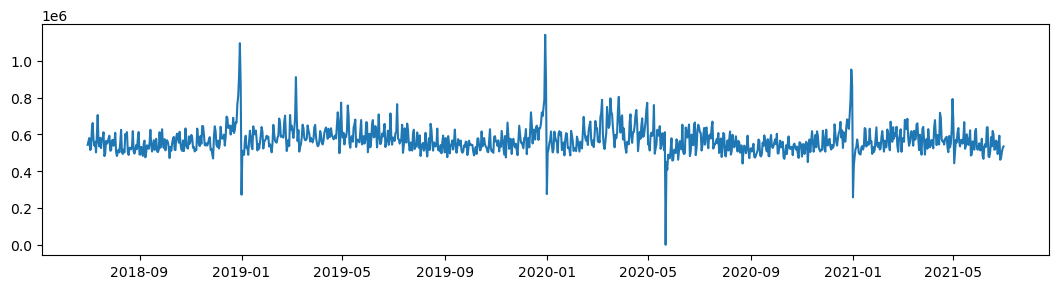

In [19]:
plt.figure(figsize=(13, 3))
time_series = df.values[0]
plt.plot(dates, time_series)
plt.show()

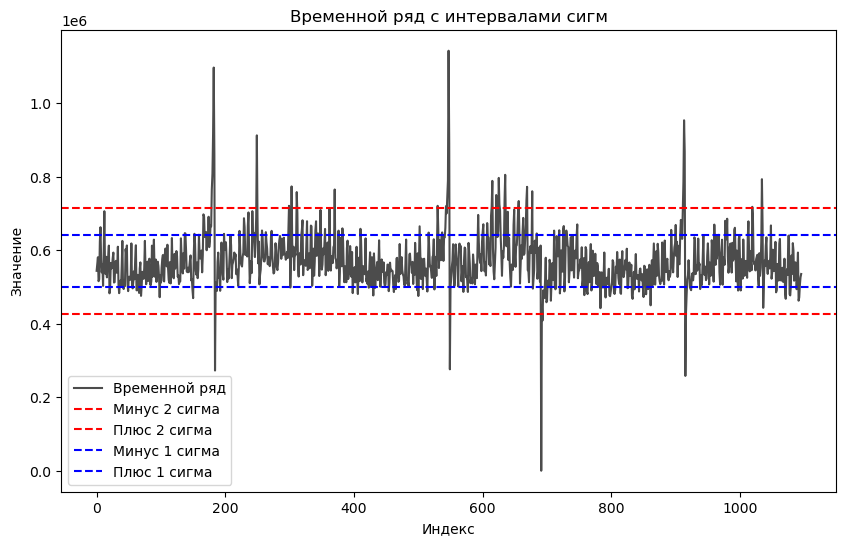

In [7]:

# Вычисление математического ожидания и стандартного отклонения
mean = np.mean(time_series)
std_dev = np.std(time_series)

# Определение границ для отсечения значений по 2 сигмам и 1 сигма
lower_bound_2sigma = mean - 2 * std_dev
upper_bound_2sigma = mean + 2 * std_dev
lower_bound_1sigma = mean - std_dev
upper_bound_1sigma = mean + std_dev

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Временной ряд', color='black',alpha =0.7)
plt.axhline(y=lower_bound_2sigma, color='red', linestyle='--', label='Минус 2 сигма')
plt.axhline(y=upper_bound_2sigma, color='red', linestyle='--', label='Плюс 2 сигма')
plt.axhline(y=lower_bound_1sigma, color='blue', linestyle='--', label='Минус 1 сигма')
plt.axhline(y=upper_bound_1sigma, color='blue', linestyle='--', label='Плюс 1 сигма')
plt.legend()
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Временной ряд с интервалами сигм')
plt.show()

In [39]:
plt.figure(figsize=(20, 6))

def plot_time_series(time_series):
    mean = np.mean(time_series)
    std_dev = np.std(time_series)

    lower_bound_2sigma = mean - 2 * std_dev
    upper_bound_2sigma = mean + 2 * std_dev
    lower_bound_1sigma = mean - std_dev
    upper_bound_1sigma = mean + std_dev

    modified_time_series = np.copy(time_series)

    modified_time_series[(modified_time_series >= lower_bound_1sigma) & (modified_time_series <= upper_bound_1sigma)] = mean

    plt.figure(figsize=(20, 6))

    # График до изменения
    plt.subplot(1, 2, 1)
    plt.grid(linestyle='dotted')
    plt.plot(time_series, color='black', alpha=0.7)
    plt.axhline(y=lower_bound_2sigma, color='red', linestyle='--', label='-2$\sigma$')
    plt.axhline(y=upper_bound_2sigma, color='red', linestyle='--', label='+2$\sigma$')
    plt.axhline(y=lower_bound_1sigma, color='blue', linestyle='--', label='-1$\sigma$')
    plt.axhline(y=upper_bound_1sigma, color='blue', linestyle='--', label='+1$\sigma$')
    plt.legend()
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.title('Временной ряд до изменения')

    # График после изменения
    plt.subplot(1, 2, 2)
    plt.grid(linestyle='dotted')
    plt.plot(modified_time_series, color='black', alpha=0.7)
    plt.axhline(y=lower_bound_2sigma, color='red', linestyle='--', label='-2$\sigma$')
    plt.axhline(y=upper_bound_2sigma, color='red', linestyle='--', label='+2$\sigma$')
    plt.axhline(y=lower_bound_1sigma, color='blue', linestyle='--', label='-1$\sigma$')
    plt.axhline(y=upper_bound_1sigma, color='blue', linestyle='--', label='+1$\sigma$')
    plt.legend()
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.title('Временной ряд после изменения')

    plt.tight_layout()
    plt.show()

    return mean, time_series, modified_time_series

# Пример использования функции
mean, original_series, modified_series = plot_time_series(time_series)

<Figure size 2000x600 with 0 Axes>

In [9]:
time_series_2 = time_series = df.values[1]

<Figure size 2000x600 with 0 Axes>

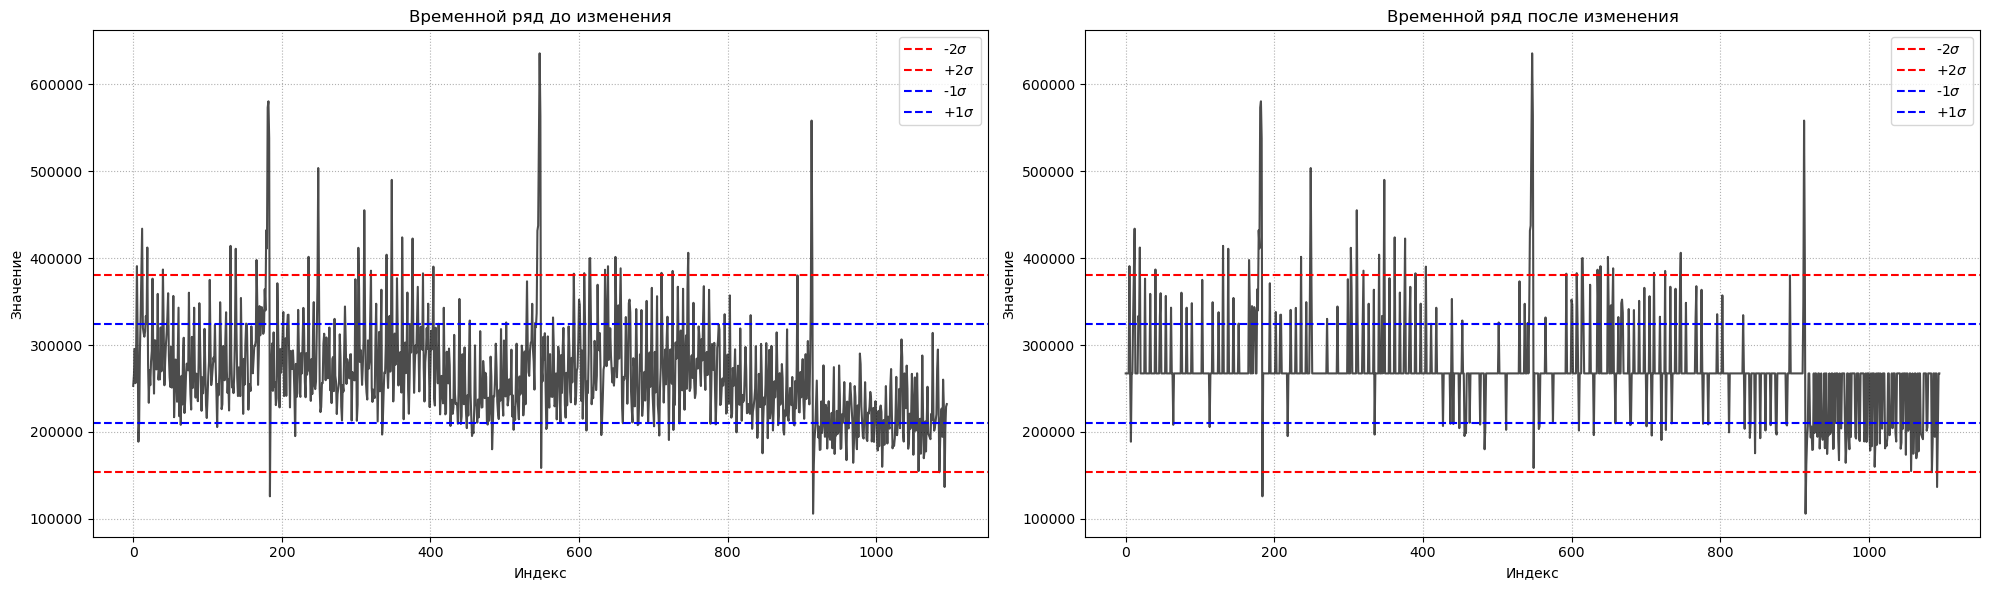

In [10]:
plt.figure(figsize=(20, 6))

mean_2, original_series_2, modified_series_2 = plot_time_series(time_series_2)

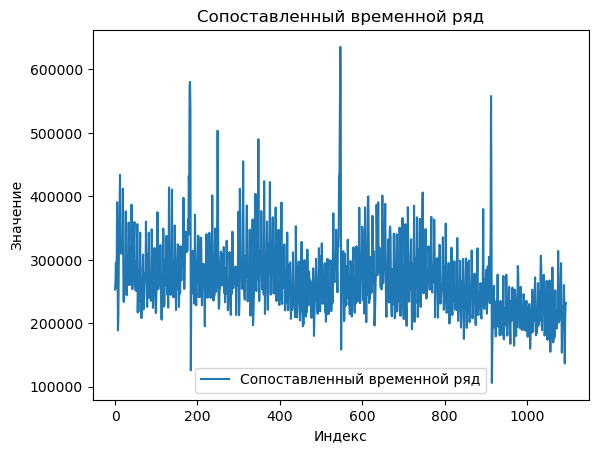

In [14]:
# Удаляем значения, равные математическому ожиданию из первого временного ряда
time_series_filtered = time_series[time_series != np.mean(time_series)]

# Удаляем значения, равные математическому ожиданию из второго временного ряда
time_series_2_filtered = time_series_2[time_series_2 != np.mean(time_series_2)]

# Находим индексы пропущенных значений в обоих временных рядах
missing_values_indices_1 = np.where(np.isnan(time_series_filtered))[0]
missing_values_indices_2 = np.where(np.isnan(time_series_2_filtered))[0]

# Сопоставляем два временных ряда
merged_series = np.zeros(max(len(time_series_filtered), len(time_series_2_filtered)))

for i in range(len(merged_series)):
    if i in missing_values_indices_1 and i in missing_values_indices_2:
        merged_series[i] = (time_series_filtered[i-1] + time_series_2_filtered[i+1]) / 2
    elif i in missing_values_indices_1:
        merged_series[i] = time_series_filtered[i-1]
    elif i in missing_values_indices_2:
        merged_series[i] = time_series_2_filtered[i+1]
    else:
        merged_series[i] = (time_series_filtered[i] + time_series_2_filtered[i]) / 2

# Построение графика
plt.plot(merged_series, label='Сопоставленный временной ряд')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Сопоставленный временной ряд')
plt.legend()
plt.show()

In [21]:
pip install tensorflow


                                              0.0/377.0 MB ? eta -:--:--
                                              0.0/377.0 MB ? eta -:--:--
                                            0.0/377.0 MB 640.0 kB/s eta 0:09:49
                                            0.0/377.0 MB 279.3 kB/s eta 0:22:30
                                            0.1/377.0 MB 521.8 kB/s eta 0:12:03
                                            0.1/377.0 MB 521.8 kB/s eta 0:12:03
                                            0.2/377.0 MB 692.9 kB/s eta 0:09:04
                                            0.2/377.0 MB 762.6 kB/s eta 0:08:15
                                            0.3/377.0 MB 824.9 kB/s eta 0:07:37
                                              0.5/377.0 MB 1.1 MB/s eta 0:05:33
                                              0.5/377.0 MB 1.1 MB/s eta 0:05:43
                                              0.7/377.0 MB 1.4 MB/s eta 0:04:27
                                              1.0/377.

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


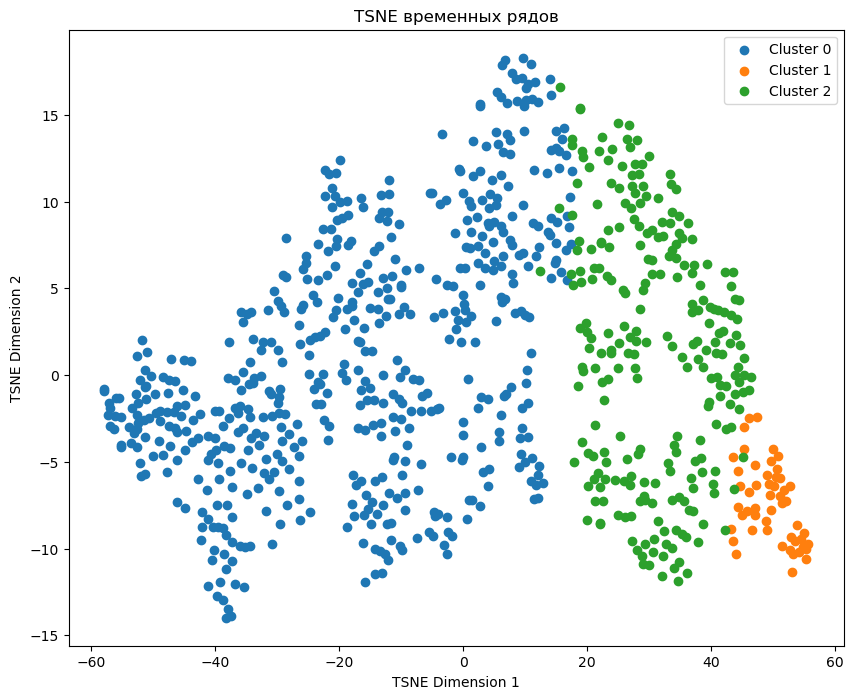

In [62]:

ts_arr =df.dropna().values
# Шаг 3: Кластеризация
num_clusters = 3  # Задаем количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(ts_arr)

# Шаг 4: TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(ts_arr)

# Шаг 5: Визуализация с аннотацией
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(tsne_results[clusters == i, 0], tsne_results[clusters == i, 1], label=f'Cluster {i}')


plt.title('TSNE временных рядов')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


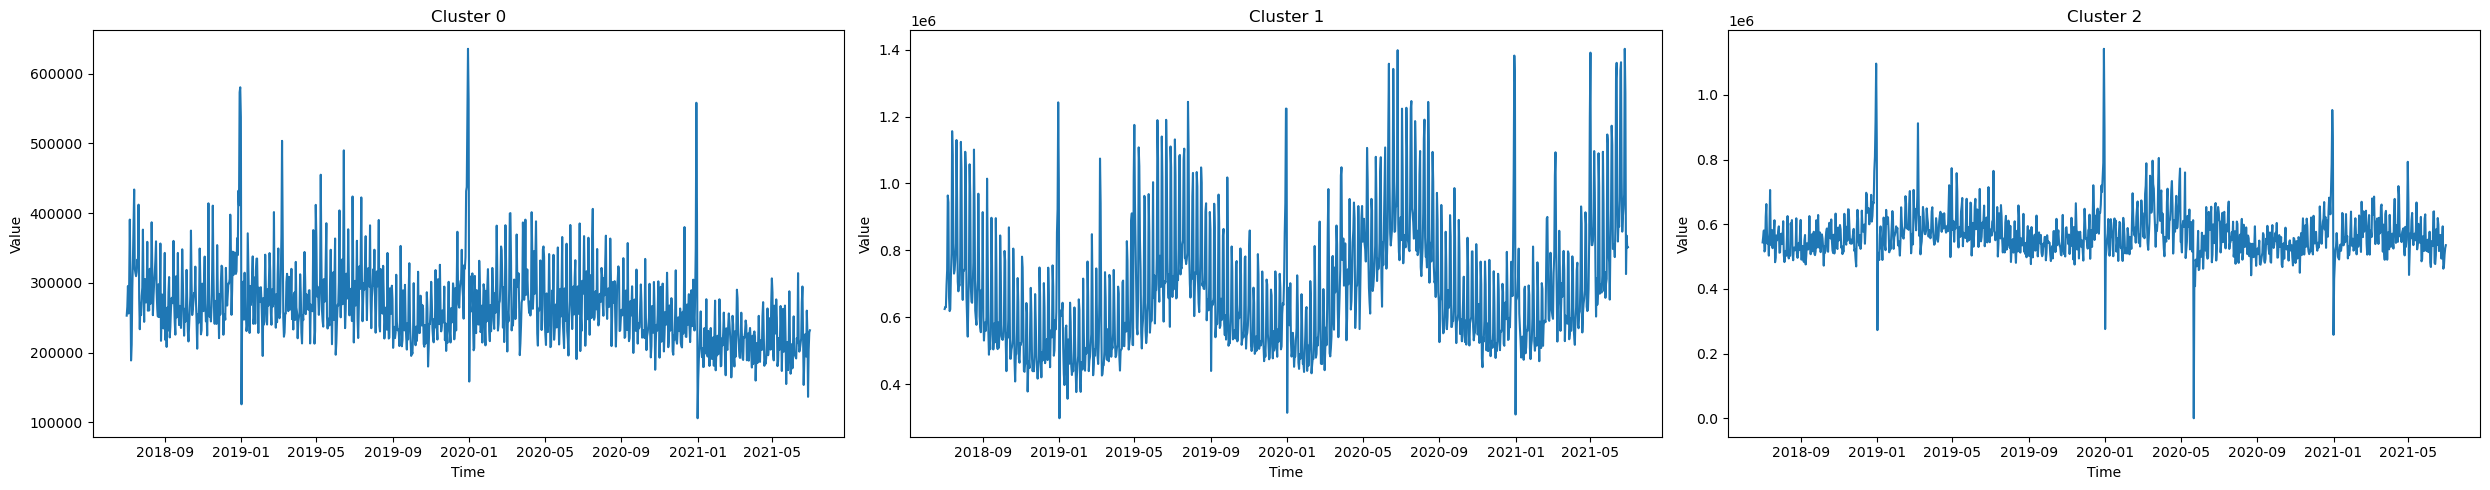

In [63]:
# Шаг 3: Кластеризация
num_clusters = 3  # Задаем количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(ts_arr)

# Получим индексы временных рядов из каждого кластера
indices_by_cluster = [np.where(clusters == i)[0] for i in range(num_clusters)]

# Выберем по одному временному ряду из каждого кластера
selected_ts = [ts_arr[indices_by_cluster[i][0]] for i in range(num_clusters)]

# Отобразим каждый выбранный временной ряд на отдельном графике
plt.figure(figsize=(25, 5))
for i in range(num_clusters):       

    plt.subplot(1, num_clusters, i+1)
    plt.plot(dates, selected_ts[i])
    plt.title(f'Cluster {i}')
    plt.xlabel('Time')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [64]:

# Пройдемся по каждому временному ряду в ts_arr, применим plot_time_series и заменим в ts_arr_modified
ts_arr_modified = []
for time_series in ts_arr:
    _, _, modified_series = plot_time_series(time_series)
    ts_arr_modified.append(modified_series)

ts_arr_modified = np.array(ts_arr_modified)

# Выведем оба массива для сравнения
print("Исходный массив временных рядов:")
print(ts_arr)
print("\nМодифицированный массив временных рядов:")
print(ts_arr_modified)

Исходный массив временных рядов:
[[543776.31 563845.34 580670.98 ... 505690.18 526306.06 535214.49]
 [253030.36 265616.8  295522.12 ... 203770.57 229060.11 232053.98]
 [304138.47 328862.84 343571.86 ... 199064.92 215155.66 213227.37]
 ...
 [223662.25 238827.63 255163.78 ... 308581.58 295317.85 313589.01]
 [356109.35 344534.83 373132.87 ... 437950.7  413952.21 407784.46]
 [128858.37 151570.64 166734.16 ... 301379.08 311080.51 320592.11]]

Модифицированный массив временных рядов:
[[570756.3017062  570756.3017062  570756.3017062  ... 570756.3017062
  570756.3017062  570756.3017062 ]
 [267353.68788321 267353.68788321 267353.68788321 ... 203770.57
  267353.68788321 267353.68788321]
 [259323.26624088 328862.84       343571.86       ... 199064.92
  259323.26624088 259323.26624088]
 ...
 [223662.25       238827.63       255163.78       ... 321306.27103102
  321306.27103102 321306.27103102]
 [356109.35       344534.83       373132.87       ... 437950.7
  413952.21       407784.46      ]
 [12885

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


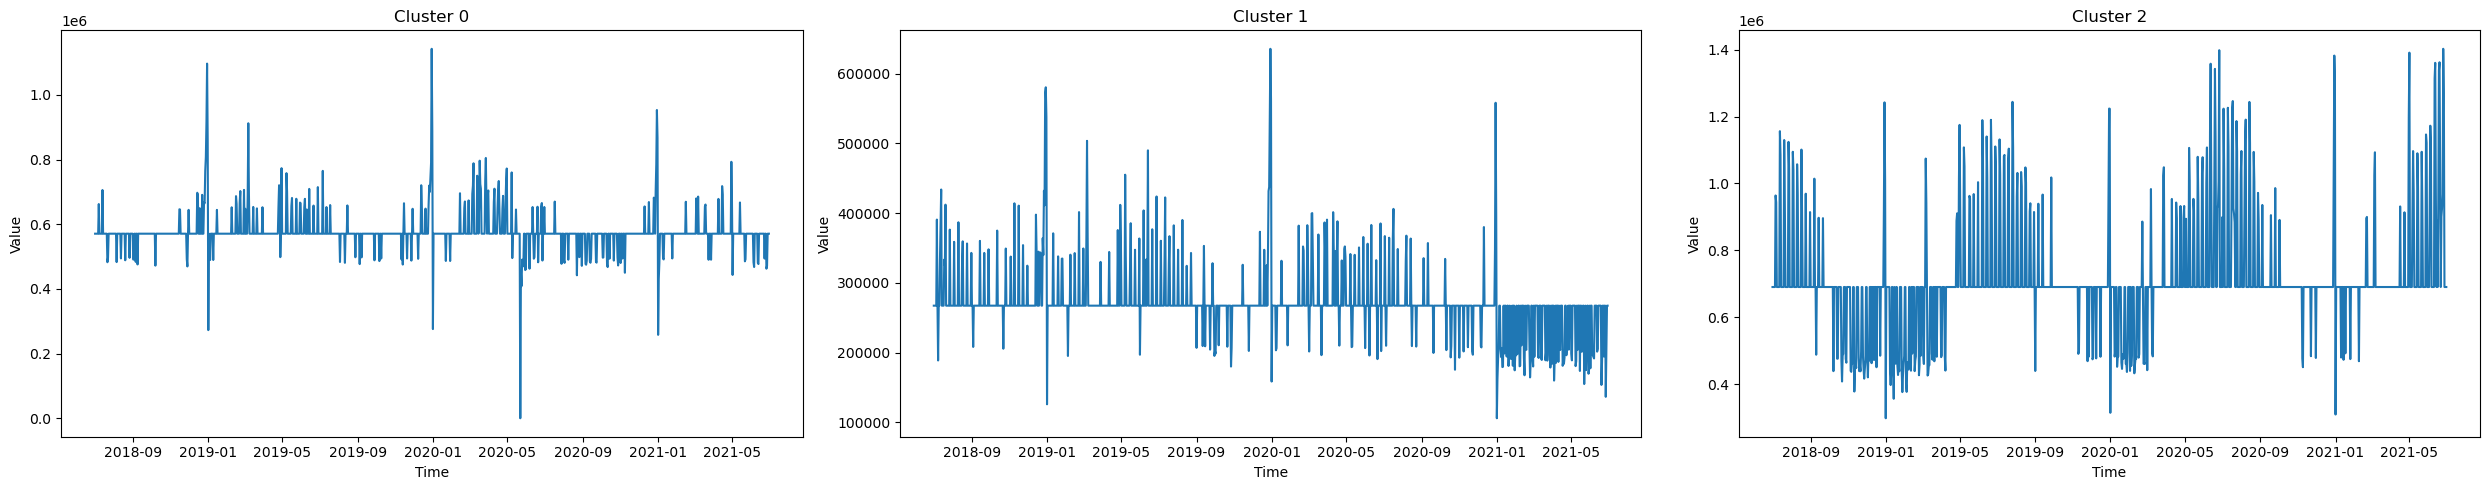

In [65]:
# Шаг 3: Кластеризация
num_clusters = 3  # Задаем количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(ts_arr_modified)

# Получим индексы временных рядов из каждого кластера
indices_by_cluster = [np.where(clusters == i)[0] for i in range(num_clusters)]

# Выберем по одному временному ряду из каждого кластера
selected_ts = [ts_arr_modified[indices_by_cluster[i][0]] for i in range(num_clusters)]

# Отобразим каждый выбранный временной ряд на отдельном графике
plt.figure(figsize=(25, 5))
for i in range(num_clusters):       

    plt.subplot(1, num_clusters, i+1)
    plt.plot(dates, selected_ts[i])
    plt.title(f'Cluster {i}')
    plt.xlabel('Time')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


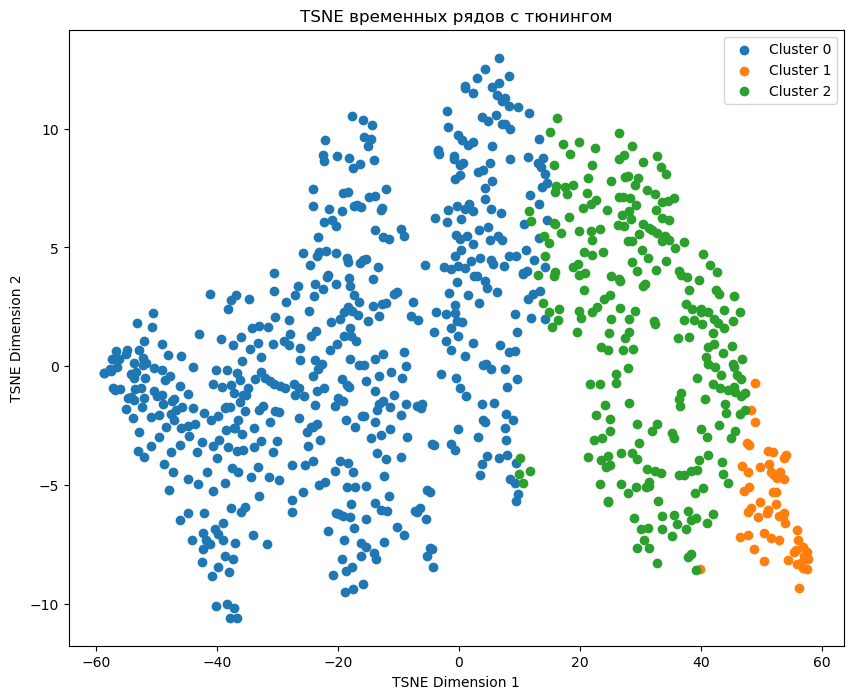

In [66]:

#ts_arr_modified =df.dropna().values
# Шаг 3: Кластеризация
num_clusters = 3  # Задаем количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(ts_arr_modified)

# Шаг 4: TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(ts_arr_modified)

# Шаг 5: Визуализация с аннотацией
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(tsne_results[clusters == i, 0], tsne_results[clusters == i, 1], label=f'Cluster {i}')


plt.title('TSNE временных рядов c тюнингом')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend()
plt.show()